In [1]:
import pandas as pd
import numpy as np 
import string
import re

#nltk

import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer as stemmer
from nltk.tokenize import word_tokenize
from nltk import download, FreqDist, WordNetLemmatizer
from nltk.tokenize.regexp import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

from collections import Counter 
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

#gensim

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

#sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#visualization

from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

lemmatizer = WordNetLemmatizer() 
ps=stemmer()

In [2]:
%pwd

'C:\\Users\\Subhasmita Purohit\\Documents\\TweetScraper'

In [3]:
%cd F:\BA\TERM-6

F:\BA\TERM-6


In [4]:
df=pd.read_csv("13Dec2019.csv",sep=",")

In [5]:
df

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,Score of the day,datetime,is_reply,is_retweet,user_id,has_media,medias
0,shujaatQuadri,1.210000e+18,I appreciate the courage of #Jamia students f...,/shujaatQuadri/status/1205540969942138880,51,69,3,123,13-12-2019 23:02,False,False,1.417397e+08,NaN,NaN
1,CkAbdulla,1.210000e+18,# JamiaMilia as established as part of the In...,/CkAbdulla/status/1205548817522683905,34,57,2,93,13-12-2019 23:33,False,False,3.345679e+08,NaN,NaN
2,ians_india,1.210000e+18,Reiterating that her government would not allo...,/ians_india/status/1205508246984744960,8,21,0,29,13-12-2019 20:52,False,False,1.415848e+08,NaN,NaN
3,firstpost,1.210000e+18,Citizenship Amendment Act (#CAA ) is an intern...,/firstpost/status/1205485772490461186,6,19,2,27,13-12-2019 19:22,False,False,2.564953e+08,NaN,NaN
4,CkAbdulla,1.210000e+18,"Yes, Muslim lives matters. \nStop Muslim Exte...",/CkAbdulla/status/1205542157798391808,6,7,1,14,13-12-2019 23:07,False,False,3.345679e+08,NaN,NaN
5,abhiksengupta,1.210000e+18,Look at this madness in #Jamia . What is more ...,/abhiksengupta/status/1205525830895407105,4,9,1,14,13-12-2019 22:02,False,False,8.230786e+08,NaN,NaN
6,hamid12345678,1.210000e+18,# CABProtests \nAmid ongoing North-east agita...,/hamid12345678/status/1205539586467717120,4,3,0,7,13-12-2019 22:56,False,False,7.600000e+17,NaN,NaN
7,GoNews_India,1.210000e+18,Amid ongoing North-east agitation over #CAA a...,/GoNews_India/status/1205485019952603137,3,3,0,6,13-12-2019 19:20,False,False,8.220000e+17,NaN,NaN
8,TheStatesmanLtd,1.210000e+18,# CitizenshipAct Protesters torch railway sta...,/TheStatesmanLtd/status/1205504827817525248,3,2,0,5,13-12-2019 20:38,False,False,1.555267e+09,True,[]
9,ians_india,1.210000e+18,Violence broke out in #WestBengal on Friday a...,/ians_india/status/1205507118633144320,3,3,2,8,13-12-2019 20:47,False,False,1.415848e+08,NaN,NaN


In [9]:
df.shape

(34, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
usernameTweet       34 non-null object
ID                  34 non-null float64
text                34 non-null object
url                 34 non-null object
nbr_retweet         34 non-null int64
nbr_favorite        34 non-null int64
nbr_reply           34 non-null int64
Score of the day    34 non-null int64
datetime            34 non-null object
is_reply            34 non-null bool
is_retweet          34 non-null bool
user_id             34 non-null float64
has_media           5 non-null object
medias              5 non-null object
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 3.4+ KB


In [13]:
df.columns

Index(['usernameTweet', 'ID', 'text', 'url', 'nbr_retweet', 'nbr_favorite',
       'nbr_reply', 'Score of the day', 'datetime', 'is_reply', 'is_retweet',
       'user_id', 'has_media', 'medias'],
      dtype='object')

In [16]:
df["has_media"].value_counts()

True    5
Name: has_media, dtype: int64

In [18]:
indexnames = df[df.has_media==True].index
print(indexnames)

Int64Index([8, 13, 15, 27, 29], dtype='int64')


In [25]:
df[8:9]


,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,Score of the day,datetime,is_reply,is_retweet,user_id,has_media,medias
8,TheStatesmanLtd,1.210000e+18,# CitizenshipAct Protesters torch railway sta...,/TheStatesmanLtd/status/1205504827817525248,3,2,0,5,13-12-2019 20:38,False,False,1.555267e+09,True,[]


In [26]:
df[13:14]

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,Score of the day,datetime,is_reply,is_retweet,user_id,has_media,medias
13,theUAVHUB,1.210000e+18,What can we do with our Drones and Aircraft wh...,/theUAVHUB/status/1205454785224286209,1,1,0,2,13-12-2019 17:19,False,False,9.610000e+17,True,['https://t.co/okYS7k5Rdn']


In [27]:
df[15:16]

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,Score of the day,datetime,is_reply,is_retweet,user_id,has_media,medias
15,jlemnaveh,1.210000e+18,# CAA statement as #British public resoundin...,/jlemnaveh/status/1205379201278328833,0,1,0,1,13-12-2019 12:19,False,False,154357957.0,True,['https://t.co/Llqszple9J']


In [28]:
df[27:28]

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,Score of the day,datetime,is_reply,is_retweet,user_id,has_media,medias
27,InterNetX,1.210000e+18,The #CAA record is the latest version of prev...,/InterNetX/status/1205521532954562560,0,1,0,1,13-12-2019 21:45,False,False,38399576.0,True,['https://t.co/IDqaVI5Vh5']


In [29]:
df[29:30]

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,Score of the day,datetime,is_reply,is_retweet,user_id,has_media,medias
29,cbcnn_Pilid,1.210000e+18,A plausible explanation of what GoI could do t...,/cbcnn_Pilid/status/1205528381179224064,0,1,0,1,13-12-2019 22:12,False,False,89482819.0,True,['https://t.co/FzWWolmyrA']


### The above data shows though these 5 indexes are represent media but doesn't have much influences in public and the score of the day are also less than or equal to 5. It shows not necessaryly only media influance people but those who are popular in twitter can also do so.

In [36]:
df["Score of the day"].describe()

count     34.000000
mean      10.441176
std       25.990897
min        0.000000
25%        0.000000
50%        1.500000
75%        5.750000
max      123.000000
Name: Score of the day, dtype: float64

In [32]:
df["usernameTweet"].value_counts().describe()

count    30.000000
mean      1.133333
std       0.345746
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: usernameTweet, dtype: float64

In [38]:
df["usernameTweet"].describe()

count            34
unique           30
top       CkAbdulla
freq              2
Name: usernameTweet, dtype: object

## Split data from datetime

In [39]:
def date(date_time):
    date=date_time.strip().split(" ")
    return(datetime.strptime(date[0],'%d-%m-%Y').date())

## Split time from datetime

In [40]:
def sep_hour(date_time):
    date=date_time.strip()
    date_=date.split(" ")
    hour=date_[1].split(':')
    return(int(hour[0]))

In [42]:
df['date']=df.apply(lambda row:date(row['datetime']),axis=1) #seperates date from the datetime

In [43]:
df['time']=df.apply(lambda row:sep_hour(row['datetime']),axis=1) #seperates date from the datetime

In [44]:
df

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,Score of the day,datetime,is_reply,is_retweet,user_id,has_media,medias,date,time
0,shujaatQuadri,1.210000e+18,I appreciate the courage of #Jamia students f...,/shujaatQuadri/status/1205540969942138880,51,69,3,123,13-12-2019 23:02,False,False,1.417397e+08,NaN,NaN,2019-12-13,23
1,CkAbdulla,1.210000e+18,# JamiaMilia as established as part of the In...,/CkAbdulla/status/1205548817522683905,34,57,2,93,13-12-2019 23:33,False,False,3.345679e+08,NaN,NaN,2019-12-13,23
2,ians_india,1.210000e+18,Reiterating that her government would not allo...,/ians_india/status/1205508246984744960,8,21,0,29,13-12-2019 20:52,False,False,1.415848e+08,NaN,NaN,2019-12-13,20
3,firstpost,1.210000e+18,Citizenship Amendment Act (#CAA ) is an intern...,/firstpost/status/1205485772490461186,6,19,2,27,13-12-2019 19:22,False,False,2.564953e+08,NaN,NaN,2019-12-13,19
4,CkAbdulla,1.210000e+18,"Yes, Muslim lives matters. \nStop Muslim Exte...",/CkAbdulla/status/1205542157798391808,6,7,1,14,13-12-2019 23:07,False,False,3.345679e+08,NaN,NaN,2019-12-13,23
5,abhiksengupta,1.210000e+18,Look at this madness in #Jamia . What is more ...,/abhiksengupta/status/1205525830895407105,4,9,1,14,13-12-2019 22:02,False,False,8.230786e+08,NaN,NaN,2019-12-13,22
6,hamid12345678,1.210000e+18,# CABProtests \nAmid ongoing North-east agita...,/hamid12345678/status/1205539586467717120,4,3,0,7,13-12-2019 22:56,False,False,7.600000e+17,NaN,NaN,2019-12-13,22
7,GoNews_India,1.210000e+18,Amid ongoing North-east agitation over #CAA a...,/GoNews_India/status/1205485019952603137,3,3,0,6,13-12-2019 19:20,False,False,8.220000e+17,NaN,NaN,2019-12-13,19
8,TheStatesmanLtd,1.210000e+18,# CitizenshipAct Protesters torch railway sta...,/TheStatesmanLtd/status/1205504827817525248,3,2,0,5,13-12-2019 20:38,False,False,1.555267e+09,True,[],2019-12-13,20
9,ians_india,1.210000e+18,Violence broke out in #WestBengal on Friday a...,/ians_india/status/1205507118633144320,3,3,2,8,13-12-2019 20:47,False,False,1.415848e+08,NaN,NaN,2019-12-13,20


## Count Hashtag

In [45]:
def len_hash(text):
    text=str(text)
    hashtag_len=text.count('#') #counts the number of # tags present in each tweet
    return int(hashtag_len) #returns the # tag count

In [46]:
df["len_hashtag"]=df.apply(lambda row:len_hash(row['text']),axis=1)

In [50]:
df

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,Score of the day,datetime,is_reply,is_retweet,user_id,has_media,medias,date,time,len_hashtag
0,shujaatQuadri,1.210000e+18,I appreciate the courage of #Jamia students f...,/shujaatQuadri/status/1205540969942138880,51,69,3,123,13-12-2019 23:02,False,False,1.417397e+08,NaN,NaN,2019-12-13,23,5
1,CkAbdulla,1.210000e+18,# JamiaMilia as established as part of the In...,/CkAbdulla/status/1205548817522683905,34,57,2,93,13-12-2019 23:33,False,False,3.345679e+08,NaN,NaN,2019-12-13,23,3
2,ians_india,1.210000e+18,Reiterating that her government would not allo...,/ians_india/status/1205508246984744960,8,21,0,29,13-12-2019 20:52,False,False,1.415848e+08,NaN,NaN,2019-12-13,20,4
3,firstpost,1.210000e+18,Citizenship Amendment Act (#CAA ) is an intern...,/firstpost/status/1205485772490461186,6,19,2,27,13-12-2019 19:22,False,False,2.564953e+08,NaN,NaN,2019-12-13,19,3
4,CkAbdulla,1.210000e+18,"Yes, Muslim lives matters. \nStop Muslim Exte...",/CkAbdulla/status/1205542157798391808,6,7,1,14,13-12-2019 23:07,False,False,3.345679e+08,NaN,NaN,2019-12-13,23,4
5,abhiksengupta,1.210000e+18,Look at this madness in #Jamia . What is more ...,/abhiksengupta/status/1205525830895407105,4,9,1,14,13-12-2019 22:02,False,False,8.230786e+08,NaN,NaN,2019-12-13,22,2
6,hamid12345678,1.210000e+18,# CABProtests \nAmid ongoing North-east agita...,/hamid12345678/status/1205539586467717120,4,3,0,7,13-12-2019 22:56,False,False,7.600000e+17,NaN,NaN,2019-12-13,22,6
7,GoNews_India,1.210000e+18,Amid ongoing North-east agitation over #CAA a...,/GoNews_India/status/1205485019952603137,3,3,0,6,13-12-2019 19:20,False,False,8.220000e+17,NaN,NaN,2019-12-13,19,5
8,TheStatesmanLtd,1.210000e+18,# CitizenshipAct Protesters torch railway sta...,/TheStatesmanLtd/status/1205504827817525248,3,2,0,5,13-12-2019 20:38,False,False,1.555267e+09,True,[],2019-12-13,20,4
9,ians_india,1.210000e+18,Violence broke out in #WestBengal on Friday a...,/ians_india/status/1205507118633144320,3,3,2,8,13-12-2019 20:47,False,False,1.415848e+08,NaN,NaN,2019-12-13,20,4


In [47]:
df["len_hashtag"].value_counts()

4    8
3    7
2    7
5    4
1    4
8    2
9    1
6    1
Name: len_hashtag, dtype: int64

In [48]:
df["len_hashtag"].describe()

count    34.000000
mean      3.588235
std       1.986586
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       9.000000
Name: len_hashtag, dtype: float64

In [52]:
df["time"].value_counts()

22    7
23    4
19    4
21    3
20    3
18    3
17    3
16    3
14    1
13    1
12    1
11    1
Name: time, dtype: int64

In [53]:
df["time"].describe()

count    34.000000
mean     19.058824
std       3.293163
min      11.000000
25%      17.000000
50%      19.500000
75%      22.000000
max      23.000000
Name: time, dtype: float64

## Cleaning text

In [54]:
def clean_text(text):
    
    text=str(text)
    stop=stopwords.words('english')  #stop words in english
    punct=string.punctuation        #punctuation
    lemmatizer = WordNetLemmatizer() #training lemmatizer function
    ps=stemmer()       
    
    text_lwr=text.lower()
    rem_hash=re.sub('#[a-z]+|# [a-z]+','',text_lwr) #removes all the hashtags from th tweet
    rem=re.sub('(pic.twitter.com)(.)+','',rem_hash) #removes pictures link in the tweet
    tweet= re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*(.)*', '', rem) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]')
    
    tweet= re.sub("\d+", "", tweet)
    tweet=[word for word in tweet if word not in punct]   #removes punctuation
    sentence=''.join(tweet)
    word=sentence.split()
    word=[tokens for tokens in word if tokens not in stop]  #removes stopwords
    word=[lemmatizer.lemmatize(token) for token in word]     
    tweet=' '.join(word)
    cleaned=re.sub(' +',' ',tweet)          #removes extra spaces
    return cleaned                      #returns the cleaned review

In [55]:
df['cleaned_text']=df.apply(lambda row:clean_text(row['text']),axis=1)

In [56]:
df

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,Score of the day,datetime,is_reply,is_retweet,user_id,has_media,medias,date,time,len_hashtag,cleaned_text
0,shujaatQuadri,1.210000e+18,I appreciate the courage of #Jamia students f...,/shujaatQuadri/status/1205540969942138880,51,69,3,123,13-12-2019 23:02,False,False,1.417397e+08,NaN,NaN,2019-12-13,23,5,appreciate courage student demonstrating नहींच...
1,CkAbdulla,1.210000e+18,# JamiaMilia as established as part of the In...,/CkAbdulla/status/1205548817522683905,34,57,2,93,13-12-2019 23:33,False,False,3.345679e+08,NaN,NaN,2019-12-13,23,3,established part independence struggle protect...
2,ians_india,1.210000e+18,Reiterating that her government would not allo...,/ians_india/status/1205508246984744960,8,21,0,29,13-12-2019 20:52,False,False,1.415848e+08,NaN,NaN,2019-12-13,20,4,reiterating government would allow nrc exercis...
3,firstpost,1.210000e+18,Citizenship Amendment Act (#CAA ) is an intern...,/firstpost/status/1205485772490461186,6,19,2,27,13-12-2019 19:22,False,False,2.564953e+08,NaN,NaN,2019-12-13,19,3,citizenship amendment act internal matter indi...
4,CkAbdulla,1.210000e+18,"Yes, Muslim lives matters. \nStop Muslim Exte...",/CkAbdulla/status/1205542157798391808,6,7,1,14,13-12-2019 23:07,False,False,3.345679e+08,NaN,NaN,2019-12-13,23,4,yes muslim life matter stop muslim exterminati...
5,abhiksengupta,1.210000e+18,Look at this madness in #Jamia . What is more ...,/abhiksengupta/status/1205525830895407105,4,9,1,14,13-12-2019 22:02,False,False,8.230786e+08,NaN,NaN,2019-12-13,22,2,ook madness painful le km away there’s school ...
6,hamid12345678,1.210000e+18,# CABProtests \nAmid ongoing North-east agita...,/hamid12345678/status/1205539586467717120,4,3,0,7,13-12-2019 22:56,False,False,7.600000e+17,NaN,NaN,2019-12-13,22,6,amid ongoing northeast agitation imposed servi...
7,GoNews_India,1.210000e+18,Amid ongoing North-east agitation over #CAA a...,/GoNews_India/status/1205485019952603137,3,3,0,6,13-12-2019 19:20,False,False,8.220000e+17,NaN,NaN,2019-12-13,19,5,amid ongoing northeast agitation imposed servi...
8,TheStatesmanLtd,1.210000e+18,# CitizenshipAct Protesters torch railway sta...,/TheStatesmanLtd/status/1205504827817525248,3,2,0,5,13-12-2019 20:38,False,False,1.555267e+09,True,[],2019-12-13,20,4,protester torch railway station bengal
9,ians_india,1.210000e+18,Violence broke out in #WestBengal on Friday a...,/ians_india/status/1205507118633144320,3,3,2,8,13-12-2019 20:47,False,False,1.415848e+08,NaN,NaN,2019-12-13,20,4,violence broke friday citizenship amendment ac...


In [57]:
df["text"]=df["text"].astype(str)

In [58]:
df['cleanedtext_len']=df.apply(lambda row:len(row['cleaned_text']),axis=1) #creating a column for length of the coresponding cleaned text
df['text_len']=df.apply(lambda row:len(row['text']),axis=1)

In [59]:
df #review

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,Score of the day,datetime,is_reply,is_retweet,user_id,has_media,medias,date,time,len_hashtag,cleaned_text,cleanedtext_len,text_len
0,shujaatQuadri,1.210000e+18,I appreciate the courage of #Jamia students f...,/shujaatQuadri/status/1205540969942138880,51,69,3,123,13-12-2019 23:02,False,False,1.417397e+08,NaN,NaN,2019-12-13,23,5,appreciate courage student demonstrating नहींच...,60,147
1,CkAbdulla,1.210000e+18,# JamiaMilia as established as part of the In...,/CkAbdulla/status/1205548817522683905,34,57,2,93,13-12-2019 23:33,False,False,3.345679e+08,NaN,NaN,2019-12-13,23,3,established part independence struggle protect...,127,212
2,ians_india,1.210000e+18,Reiterating that her government would not allo...,/ians_india/status/1205508246984744960,8,21,0,29,13-12-2019 20:52,False,False,1.415848e+08,NaN,NaN,2019-12-13,20,4,reiterating government would allow nrc exercis...,163,307
3,firstpost,1.210000e+18,Citizenship Amendment Act (#CAA ) is an intern...,/firstpost/status/1205485772490461186,6,19,2,27,13-12-2019 19:22,False,False,2.564953e+08,NaN,NaN,2019-12-13,19,3,citizenship amendment act internal matter indi...,113,227
4,CkAbdulla,1.210000e+18,"Yes, Muslim lives matters. \nStop Muslim Exte...",/CkAbdulla/status/1205542157798391808,6,7,1,14,13-12-2019 23:07,False,False,3.345679e+08,NaN,NaN,2019-12-13,23,4,yes muslim life matter stop muslim exterminati...,58,136
5,abhiksengupta,1.210000e+18,Look at this madness in #Jamia . What is more ...,/abhiksengupta/status/1205525830895407105,4,9,1,14,13-12-2019 22:02,False,False,8.230786e+08,NaN,NaN,2019-12-13,22,2,ook madness painful le km away there’s school ...,136,305
6,hamid12345678,1.210000e+18,# CABProtests \nAmid ongoing North-east agita...,/hamid12345678/status/1205539586467717120,4,3,0,7,13-12-2019 22:56,False,False,7.600000e+17,NaN,NaN,2019-12-13,22,6,amid ongoing northeast agitation imposed servi...,80,229
7,GoNews_India,1.210000e+18,Amid ongoing North-east agitation over #CAA a...,/GoNews_India/status/1205485019952603137,3,3,0,6,13-12-2019 19:20,False,False,8.220000e+17,NaN,NaN,2019-12-13,19,5,amid ongoing northeast agitation imposed servi...,126,266
8,TheStatesmanLtd,1.210000e+18,# CitizenshipAct Protesters torch railway sta...,/TheStatesmanLtd/status/1205504827817525248,3,2,0,5,13-12-2019 20:38,False,False,1.555267e+09,True,[],2019-12-13,20,4,protester torch railway station bengal,38,219
9,ians_india,1.210000e+18,Violence broke out in #WestBengal on Friday a...,/ians_india/status/1205507118633144320,3,3,2,8,13-12-2019 20:47,False,False,1.415848e+08,NaN,NaN,2019-12-13,20,4,violence broke friday citizenship amendment ac...,147,273


In [60]:
df["cleanedtext_len"].describe()

count     34.000000
mean      95.911765
std       50.051106
min       12.000000
25%       58.500000
50%       89.000000
75%      135.500000
max      179.000000
Name: cleanedtext_len, dtype: float64

In [61]:
df["text_len"].describe()

count     34.000000
mean     217.882353
std       77.935002
min       70.000000
25%      153.750000
50%      227.000000
75%      280.250000
max      366.000000
Name: text_len, dtype: float64

In [62]:
def sentiment_scores(sentence): 
  
    obj=SentimentIntensityAnalyzer() 
  
    sentiment_dict=obj.polarity_scores(sentence) #finding polarity score
 
    if sentiment_dict['compound']>=0.05 :     #score is greater than 0.05 then the tweet is positive
        return "Positive"
  
    elif sentiment_dict['compound']<=-0.05 :  #score  less than -0.05 is negative
        return "Negative"
  
    else : 
        return "Neutral"

In [63]:
df['sentiment']=df.apply(lambda row:sentiment_scores(row['text']),axis=1)

In [64]:
df["sentiment"].value_counts()

Negative    20
Positive     9
Neutral      5
Name: sentiment, dtype: int64

### KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.

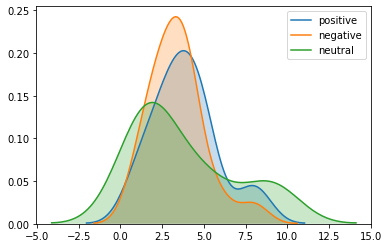

In [67]:
sns.kdeplot(df.loc[df['sentiment']=='Positive','len_hashtag'],shade=True,label='positive') #distribution of positive tweets
sns.kdeplot(df.loc[df['sentiment']=='Negative','len_hashtag'],shade=True,label='negative')#distribution of negative tweets
sns.kdeplot(df.loc[df['sentiment']=='Neutral','len_hashtag'],shade=True,label='neutral')

In [89]:
x1= df.loc[df.sentiment=='Positive', 'time']   #time in which positive tweets are tweeted
x2= df.loc[df.sentiment=='Negative', 'time']   #time in which negative tweets are tweeted
x3= df.loc[df.sentiment=='Neutral', 'time']

(array([1., 0., 0., 0., 1., 1., 0., 0., 3., 3.]),
 array([11. , 12.2, 13.4, 14.6, 15.8, 17. , 18.2, 19.4, 20.6, 21.8, 23. ]),
 <a list of 10 Patch objects>)

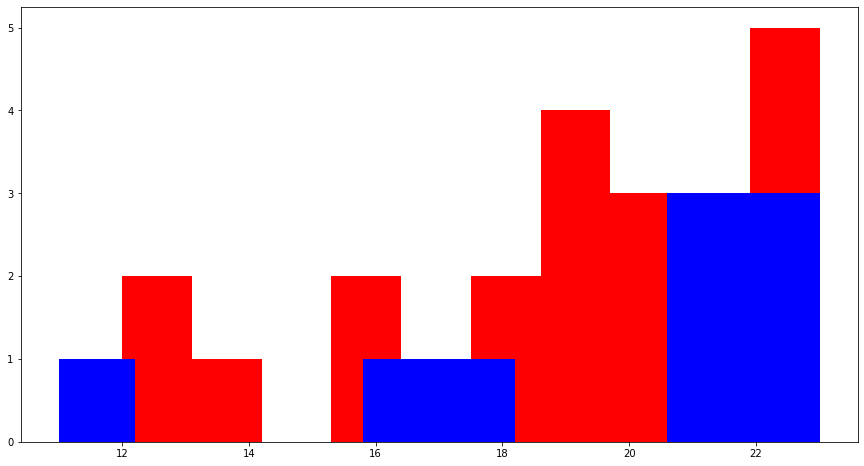

In [86]:
plt.figure(figsize=(15,8))
plt.hist(x2, color='r', label='Negative')
plt.hist(x1, color='b', label='Positive')

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ]),
 <a list of 10 Patch objects>)

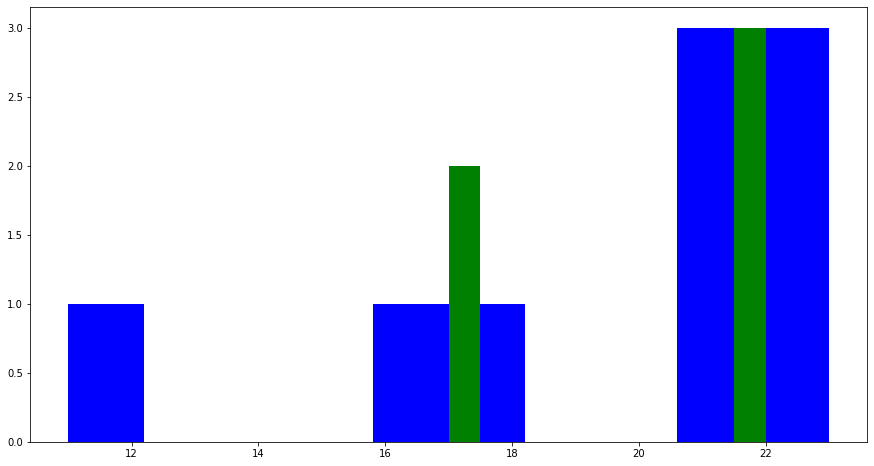

In [87]:
plt.figure(figsize=(15,8))
plt.hist(x1, color='b', label='Positive')
plt.hist(x3, color='g', label='Neutral')


(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ]),
 <a list of 10 Patch objects>)

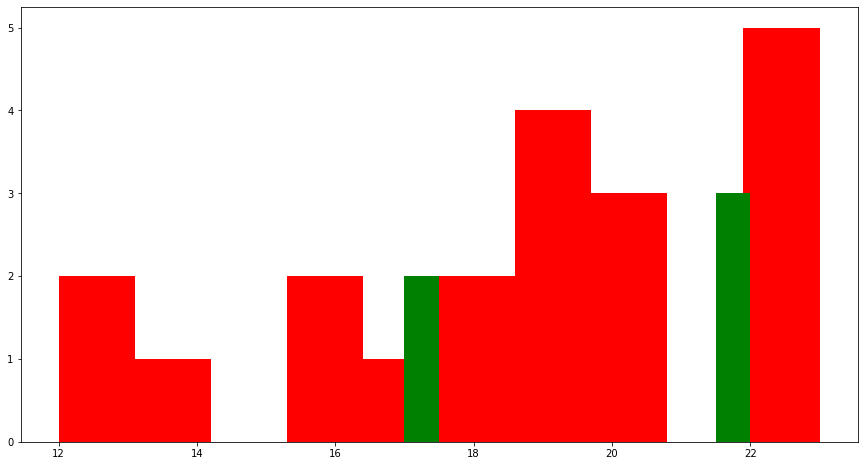

In [88]:
plt.figure(figsize=(15,8))
plt.hist(x2, color='r', label='Negative')
plt.hist(x3, color='g', label='Neutral')

In [90]:
y1= df.loc[df.sentiment=='Positive', 'date']   #time in which positive tweets are tweeted
y2= df.loc[df.sentiment=='Negative', 'date']   #time in which negative tweets are tweeted
y3= df.loc[df.sentiment=='Neutral', 'date']

(array([0., 0., 0., 0., 0., 9., 0., 0., 0., 0.]),
 array([737405.5, 737405.6, 737405.7, 737405.8, 737405.9, 737406. ,
        737406.1, 737406.2, 737406.3, 737406.4, 737406.5]),
 <a list of 10 Patch objects>)

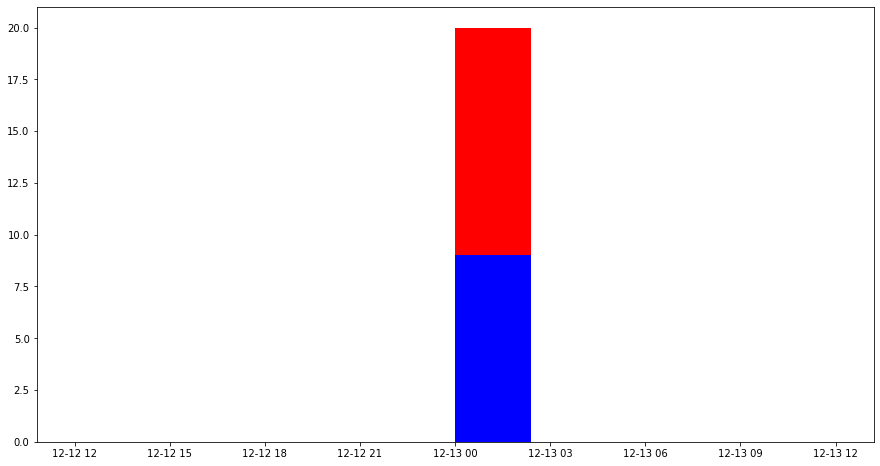

In [91]:
plt.figure(figsize=(15,8))
plt.hist(y2, color='r', label='Negative')
plt.hist(y1, color='b', label='Positive')

(array([0., 0., 0., 0., 0., 5., 0., 0., 0., 0.]),
 array([737405.5, 737405.6, 737405.7, 737405.8, 737405.9, 737406. ,
        737406.1, 737406.2, 737406.3, 737406.4, 737406.5]),
 <a list of 10 Patch objects>)

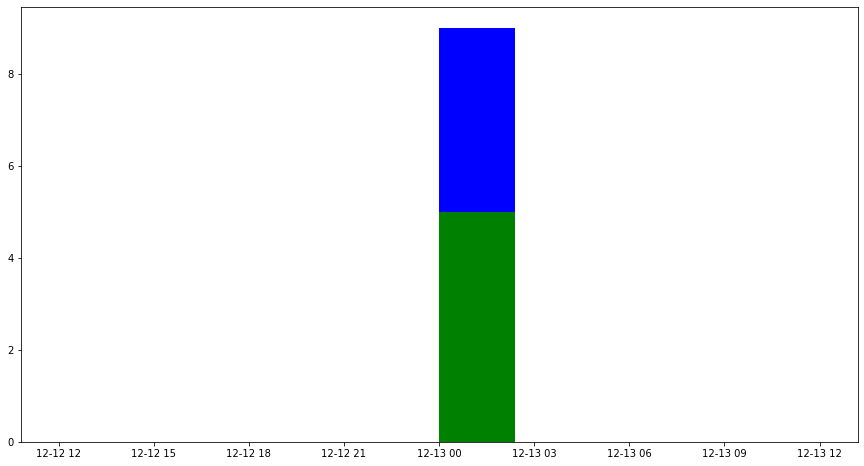

In [92]:
plt.figure(figsize=(15,8))
plt.hist(y1, color='b', label='Positive')
plt.hist(y3, color='g', label='Neutral')

(array([0., 0., 0., 0., 0., 5., 0., 0., 0., 0.]),
 array([737405.5, 737405.6, 737405.7, 737405.8, 737405.9, 737406. ,
        737406.1, 737406.2, 737406.3, 737406.4, 737406.5]),
 <a list of 10 Patch objects>)

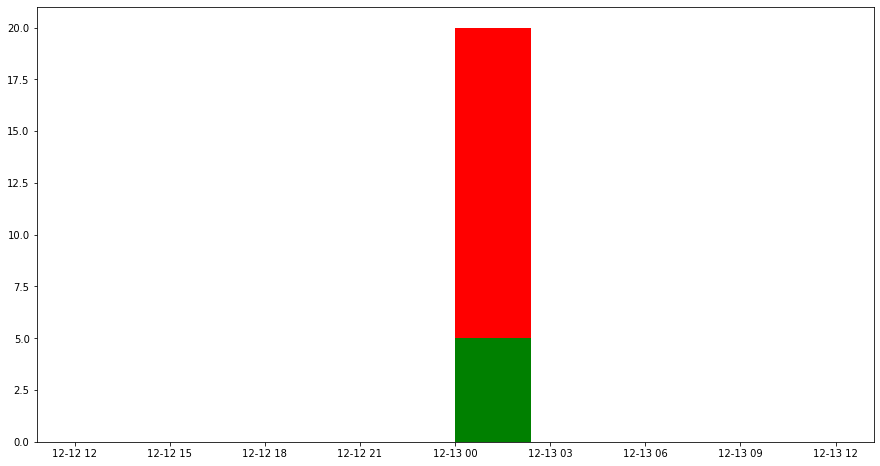

In [93]:
plt.figure(figsize=(15,8))
plt.hist(y2, color='r', label='Negative')
plt.hist(y3, color='g', label='Neutral')

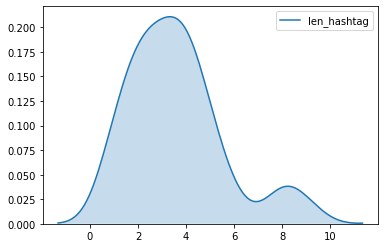

In [69]:
sns.kdeplot(df['len_hashtag'],shade=True)

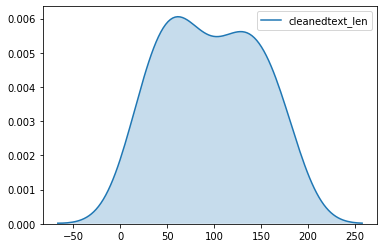

In [71]:
sns.kdeplot(df['cleanedtext_len'],shade=True) 

In [73]:
df["nbr_retweet"].describe()

count    34.000000
mean      3.764706
std      10.269280
min       0.000000
25%       0.000000
50%       0.000000
75%       3.000000
max      51.000000
Name: nbr_retweet, dtype: float64

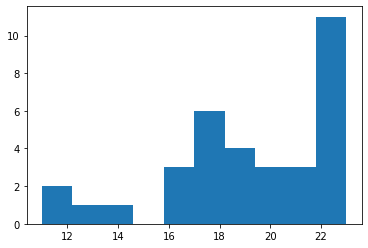

In [74]:
plt.hist(df['time']) #time in which tweets are tweeted
plt.show()

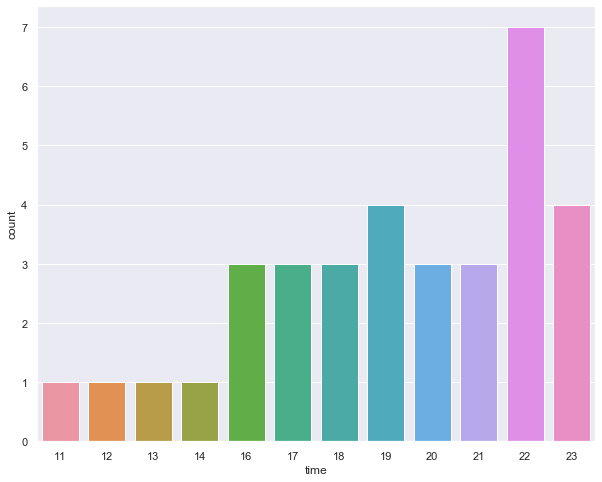

In [94]:
sns.set(style='darkgrid')
rcParams['figure.figsize'] = 10,8
ax=sns.countplot(x='time',data=df) 

In [99]:
df["date_use"]=df["date"]

In [100]:
df["date_use"]=df["date_use"].astype(str)

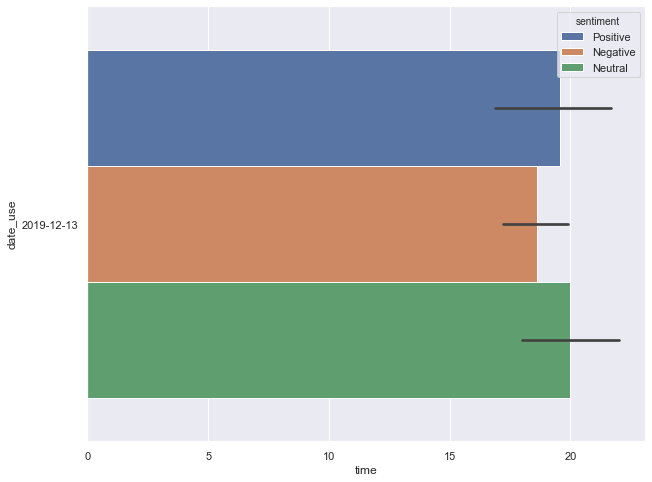

In [102]:
sns.barplot(x='time',y='date_use', hue='sentiment', data=df) #Date wise sentiment

## Extract hashtag

In [103]:
hashtags=[]
def hash_tag(string):
    hash_tags=re.findall('#[a-z]+|# [a-z]+',string.lower()) #regex to extract all hashtags
    hashtags.append(hash_tags)
    return(' '.join(hash_tags))

In [105]:
df['hash_tag']=df.apply(lambda row:hash_tag(row['text']),axis=1)

In [106]:
df["hash_tag"].describe()

count       34
unique      31
top       #caa
freq         4
Name: hash_tag, dtype: object

## Conver Hashtag in to list

In [107]:
List_hashtags=[]
temp=' '.join(str(' '.join(str(item.replace(' ','')) for item in tokens)) for tokens in hashtags) 
#takes all the hashtags from dataframe clear all the spaces and the convert them to a string
List_hashtags=temp.split(' ')

In [108]:
def commonhashtag(words):
    freq_counter=Counter(words)                      # counts the hashtags
    top_words=freq_counter.most_common(15)           # top 15 hashtags
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]      # returns the hastag word
    data['freq']=[val[1] for val in top_words]       # returns the frequency of the hashtag in the tweets
    sns.barplot(y='words',x='freq',data=data)

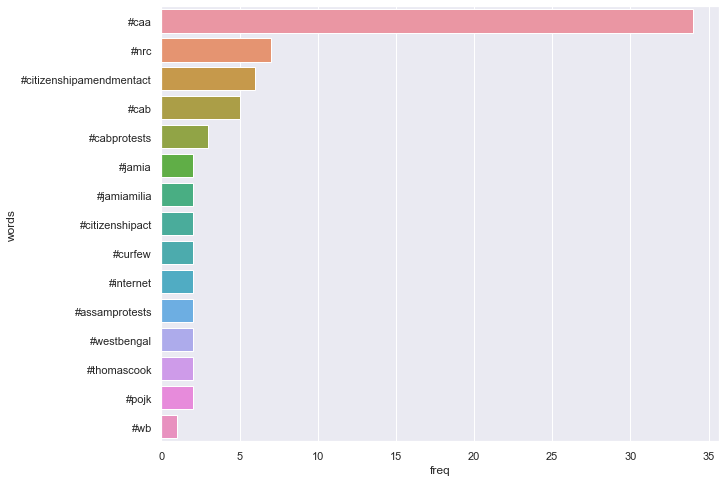

In [109]:
commonhashtag(List_hashtags) 

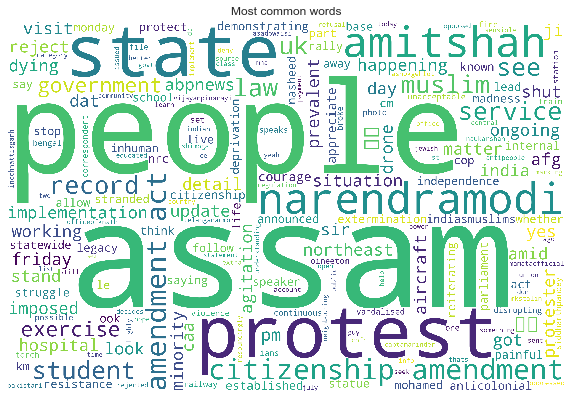

In [110]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=3000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_text'].tolist())) #converts the dataframe into a list and generates the wordcloud
plt.imshow(wordcloud)
plt.title("Most common words")
plt.axis('off')
plt.show()

In [111]:
positive_tweet=df.loc[df['sentiment']=='Positive','cleaned_text'].tolist()#list of positive tweets
negative_tweet=df.loc[df['sentiment']=='Negative','cleaned_text'].tolist()#list of negative tweets

In [112]:
positive_tweet

['appreciate courage student demonstrating नहींचलेगा नहींचलेगा',
 'yes muslim life matter stop muslim extermination act known',
 'pakistani guy sensible better understanding highly educated indian muslim like asadowaisi hope learn something',
 'yeah thats seek help oppressed minority neighbouring country',
 'ukcaa thomascookuk got kidding next god damn bra size absolute fucking joke',
 'championship match eagle classic',
 'way see trailer note dat caters persecuted minority neighboring nation bd pak afg afg border thru dis signal loud n clear dat narendramodi ji amitshah ji plan regain ctrl yippee',
 'record latest version previous record defines ca issue certificate specific caa record easily stored new look article',
 'sir whole assam burning assured assam dont worry passing sir people assam dyingcant see people assam opposing caa cant see narendramodi amitshah']

In [113]:
negative_tweet

['established part independence struggle protect anticolonial legacy resistance inhuman citizenship deprivation law indiasmuslims',
 'reiterating government would allow nrc exercise implementation citizenship amendment act cm friday announced statewide protest monday saying lead rally base statue',
 'citizenship amendment act internal matter india say parliament speaker mohamed nasheed follow live update protest',
 'ook madness painful le km away there’s school hospital think stranded whether it’s cop student unacceptable happening one continuous law',
 'amid ongoing northeast agitation imposed service shut detail prevalent situation',
 'amid ongoing northeast agitation imposed service shut correspondent siddharthpandey speaks oineetom detail prevalent situation',
 'protester torch railway station bengal',
 'violence broke friday citizenship amendment act also possible exercise state protester vandalised set fire disrupting train service photo ians file',
 'vijayanpinarayi captamarinde

In [117]:
def commonwords(tweet,top=10):
    tweets=" ".join(tweet)
    tokenised_tweets=tweets.split(" ")
    
    
    freq_counter=Counter(tokenised_tweets) #counts the occurance
    return freq_counter.most_common(top)

In [118]:
top_10_positive_words=commonwords(positive_tweet,10)

In [120]:
top_10_positive_words

[('assam', 4),
 ('muslim', 3),
 ('see', 3),
 ('record', 3),
 ('नहींचलेगा', 2),
 ('minority', 2),
 ('dat', 2),
 ('afg', 2),
 ('narendramodi', 2),
 ('ji', 2)]

In [121]:
top_10_negative_words=commonwords(negative_tweet,10)

In [122]:
top_10_negative_words

[('citizenship', 5),
 ('amendment', 4),
 ('act', 4),
 ('protest', 4),
 ('law', 3),
 ('service', 3),
 ('state', 3),
 ('people', 3),
 ('exercise', 2),
 ('implementation', 2)]

In [123]:
def plotCommonWords(tweets,top=20,title="Positive tweet",color="blue",axis=None):
    top_words=commonwords(tweets,top=top)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(top))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(top))

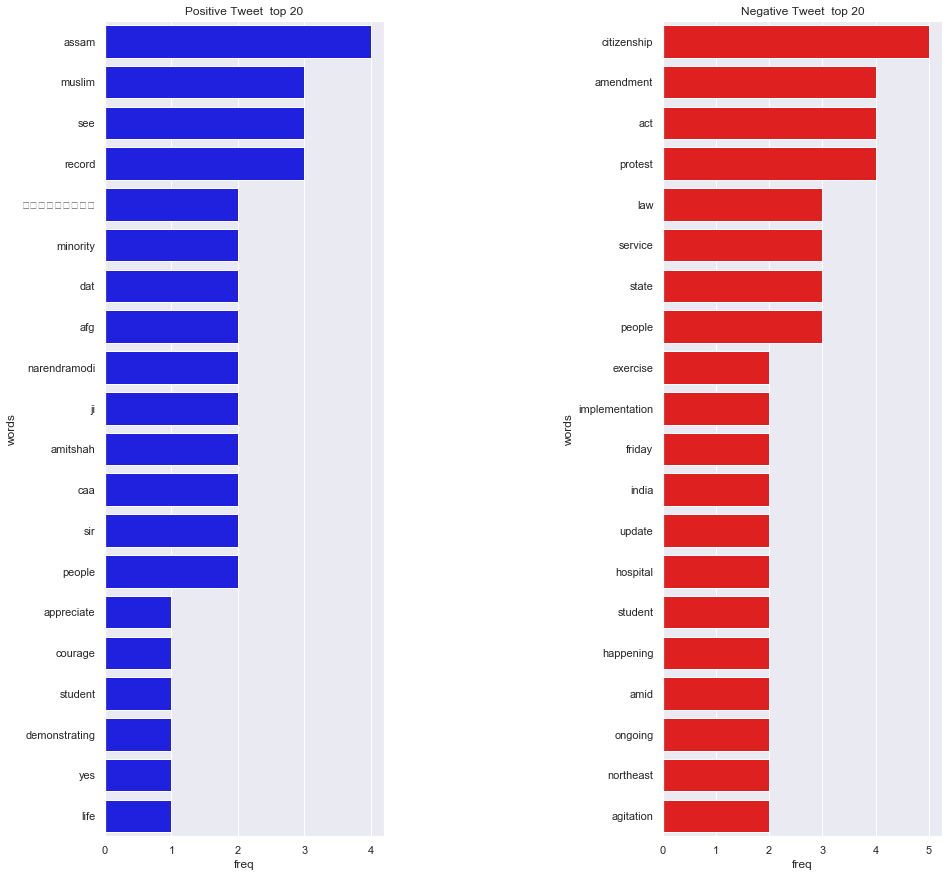

In [125]:
rcParams['figure.figsize'] = 15,15
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotCommonWords(positive_tweet,20,"Positive Tweet ",axis=ax[0])

plotCommonWords(negative_tweet,20,"Negative Tweet ",color="red",axis=ax[1])

## Bigram

In [127]:
def generateNGram(text,n=2):  #bigram
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams] #joins two consecutive words

In [128]:
positive_tweets_bigrams=[" ".join(generateNGram(tweet)) for tweet in positive_tweet] #positive  bigrams
negative_tweets_bigrams=[" ".join(generateNGram(tweet)) for tweet in negative_tweet] #negative bigrams

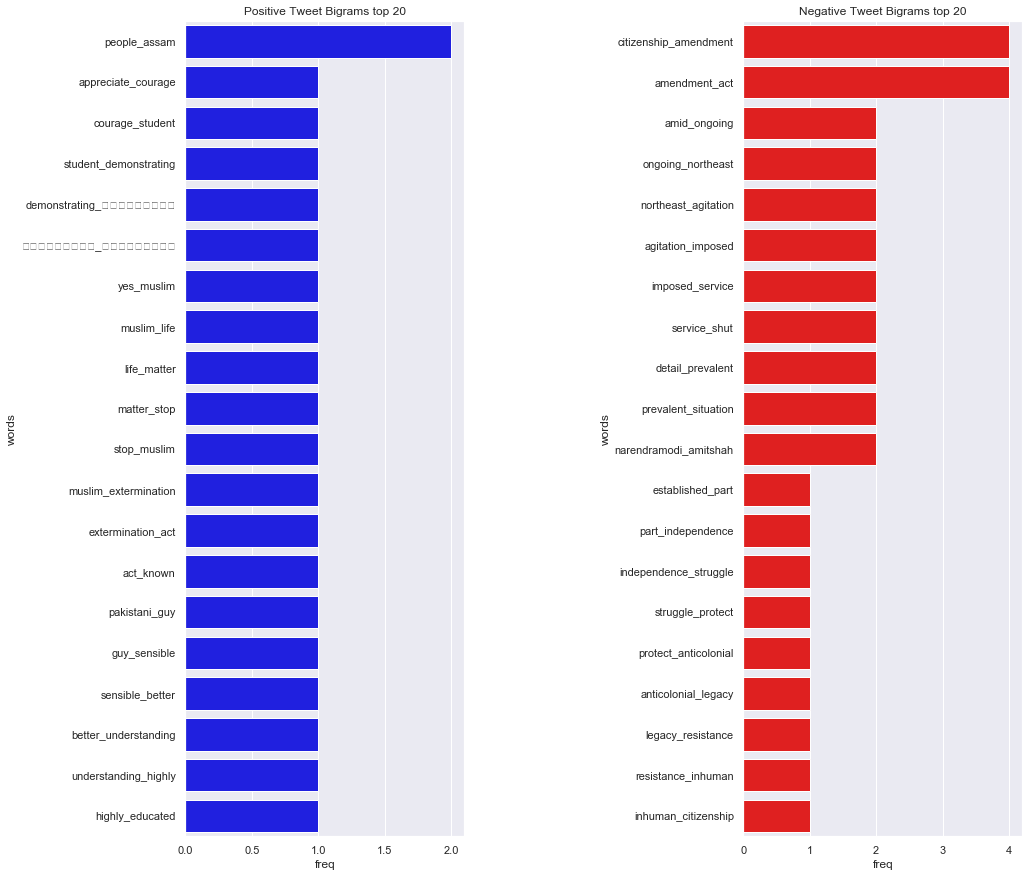

In [129]:
rcParams['figure.figsize'] = 15,15
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotCommonWords(positive_tweets_bigrams,20,"Positive Tweet Bigrams",axis=ax[0])

plotCommonWords(negative_tweets_bigrams,20,"Negative Tweet Bigrams",color="red",axis=ax[1])

In [133]:
def preprocess(row):
    result = []
    text=row['cleaned_text']
    for token in gensim.utils.simple_preprocess(text): 
        if len(token) > 3:                              #only for the text whose length is greater than 3
            #print(token)
            result.append(token)
    return result

In [134]:
pre_text=df.apply(lambda row:preprocess(row),axis=1)

In [139]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=5, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['cleaned_text']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()


In [140]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 5

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0) #model is our LDA algorithm model object


In [141]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [142]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)                       #each topic is a list of words/tokens and weights

In [143]:
no_top_words =5
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,act,0.2,act,1.2,citizenship,5.2,act,0.2,act,0.2
1,citizenship,0.2,citizenship,0.2,act,4.2,citizenship,0.2,citizenship,0.2


## Clustering

In [145]:
documents=df['cleaned_text']
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 5#no of clusters
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:\n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i,'\n'),
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind]),
    print('\n')

print("\n")

Top terms per cluster:

Cluster 0: 

 state
 uk
 drone
 rape
 classic


Cluster 1: 

 assam
 remove
 got
 people
 record


Cluster 2: 

 office
 shimoga
 dc
 today
 protest


Cluster 3: 

 act
 citizenship
 amendment
 protest
 yes


Cluster 4: 

 नह
 चल
 student
 appreciate
 courage




